# **<center>Bezier-Kurven</center>**

In diesem folgenden Dokument werden die Mathematischen Attribute der Quadratischen und der Kubischen Bezier Kurve aufgezeigt und grafisch dagestellt.

# Problemlösung

## Aufgabe 1:
Manuel Schmidbauer

Vorerst wurde eine QuadraticBezier Klasse, welche die gewünschte Funktion für die Kurve aufstellt und die nötigen Plots bereitstellt.
Die Verwendeten Formeln wurden von http://www.fachgruppe-computeralgebra.de/data/JdM-2008/Sonderheft.pdf (S. 11) entnommen und zusammen in eine Kurvenformel gepackt.

In [145]:
class QuadraticBezier:
    """
    Implementation of a quadratic bezier curve
    :author Manuel Schmidbauer:
    """
    
    def __init__(self, A, B, C):
        """
        Creates a new quadratic bezier curve
        :param A: vector representing the start point
        :param B: vector representing the control point
        :param C: vector representing the end point
        """
        t = var('t')
        
        self.A = A
        self.B = B
        self.C = C
        
        # Functions for the points D and E
        D = A + t*(B - A)
        E = B + t*(C - B)
        
        # Function for the final curve
        self.curve = D + t * (E - D)
    
    def get_plot(self):
        curve_plot = parametric_plot((self.curve[0], self.curve[1]), 
                                     (0, 1),
                                     color='blue',
                                     thickness=2,
                                     zorder=0)
        points_plot = points([self.A, self.B, self.C], 
                             size=50,
                             color='red',
                             zorder=2)
        lines_plot = line([self.A, self.B, self.B, self.C], 
                          color='green',
                          zorder=1)    
        return curve_plot, points_plot, lines_plot

Zudem ein kleines Test Programm

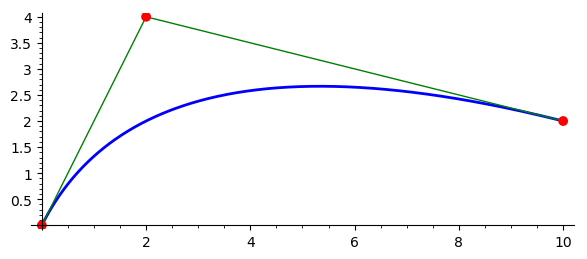

In [146]:
curve = QuadraticBezier(vector([0, 0]), vector([2, 4]), vector([10, 2]))
plots = curve.get_plot()
show(plots[0] + plots[1] + plots[2])

## Aufgabe 2:  
Andreas Hager

Hier soll die obige Konstruktionsidee auf kubische Bezierkurven erweitert werden.  
Die Konstruktionsidee und die Grundlage der grafischen Darstellung habe ich aus dem Abschnitt "Kubische Bezierkurven (n=3)" des Artikels "Bezierkurve" unter https://de.wikipedia.org/wiki/B%C3%A9zierkurve#B%C3%A9zierkurven_bis_zum_dritten_Grad.  
Für die Form des Algorithmus habe ich die Quelle http://www.fachgruppe-computeralgebra.de/data/JdM-2008/Sonderheft.pdf (2008, S. 9-11) zu Rate gezogen.   

```
Seien A, B, C, D element RxR  
Strecken AB, BC, CD  
Sei E element RxR ein Punkt auf der Strecke AB  
Sei t element R  
Wähle t so das t = AE / AD  
      => t element [0, 1]  
Wähle F, G, H, I, J element RxR,  
    so dass gilt:  
       F = B + t*BC  
       G = C + t*CD  
       H = E + t*EF  
       I = F + t*FG  
       J = H + t*HI 
Der Punkt J wandert auf der Kurve.
```

In [147]:
class CubicBezier:
    """
    :author Andreas Hager:
    Diese Klasse repräsentiert eine kubische Bezier-Kurve.
    """
    
    def __init__(self, a, b, c, d):
        """
        Initialisiert die kubische Bezier-Kurve.
        :param a: Vektor repräsentiert den Startpubkt, bei t=0.
                    Dieser Punkt liegt immer auf der Kurve.
        :param b: Vektor repräsentiert einen mittleren korntrollpunkt.
                    Dieser muss nicht auf der Kurve liegen.
        :param c: Vektor repräsentiert den 2. mittleren korntrollpunkt.
                    Dieser muss nicht auf der Kurve liegen.
        :param d: Vektor repräsentiert den Endpunkt, bei t=1.
                    Dieser Punkt liegt immer auf der Kurve.
        """
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        
        # Varibale, von der die Kurve abhängt.
        t = var('t')
        assume(t >= 0)
        assume(t <= 1)
        
        # Vektoren in abhängigkeit von t.
        self.e = self.a + t*(self.b - self.a)
        self.f = self.b + t*(self.c - self.b)
        self.g = self.c + t*(self.d - self.c)
        self.h = self.e + t*(self.f - self.e)
        self.i = self.f + t*(self.g - self.f)
        # Vektor dessen Verlauf für t=[0, 1] die Bezier-Kurve darstellt.
        self.j = self.h + t*(self.i - self.h)

    def get_points(self):
        """
        Getter für Fixpunkte.
        """
        return self.a, self.b, self.c, self.d
        
    def get_explicit_curve(self):
        """
        Gibt eine vollständig vereinfachte algebraische Darstellung der Kurve zurück.
        """
        self.j[0] = self.j[0].full_simplify()
        self.j[1] = self.j[1].full_simplify()
        return self.j
    
    
    
    def plot_curve(self, upTo=1):
        """
        Plottet den Graphen der Kurve.
        :param upTo: gibt an bis zu welchen t die Kurve geplottet werden soll. upTo >0 und upTo <= 1.
        """
        courve = self.get_explicit_curve()
        return parametric_plot((courve[0], courve[1]), (0, upTo), color='blue', thickness=2, zorder=0)
     
    def plot_fix_points(self):
        """
        Plottet die Fixpunkte.
        """
        return list_plot([self.a, self.b, self.c, self.d], size=50, color='red', zorder=2)
    
    def plot_base_lines(self):
        """
        Plottet die Strecken zwischen den Fixpunkten.
        """
        punkte = [self.a, self.b, self.c, self.d]
        plot = line([self.a, self.b], color='green', thickness=2, zorder=1)
        plot += line([self.b, self.c], color='green', thickness=2, zorder=1)
        plot += line([self.c, self.d], color='green', thickness=2, zorder=1)
        return plot
   
    def plot_variable_points(self, value_of_t):
        """
        Plottet die Variablen Punkte.
        :param value_of_t: wert den self.t annehmen soll. value_of_t >= 0 und value_of_t <= 1.
        """
        points = [self.e.substitute(t=value_of_t), 
                  self.f.substitute(t=value_of_t), 
                  self.g.substitute(t=value_of_t), 
                  self.h.substitute(t=value_of_t), 
                  self.i.substitute(t=value_of_t), 
                  self.j.substitute(t=value_of_t)]
        return list_plot(points, size=50, color='red', zorder=2)
    
    def plot_variable_lines(self, value_of_t):
        """
        Plottet die Variablen Strecken zwischen den variablen Punkten.
        :param value_of_t: wert den self.t annehmen soll. value_of_t >= 0 und value_of_t <= 1.
        """
        # Strecke EF
        EF = [(self.e.substitute(t=value_of_t)), (self.f.substitute(t=value_of_t))]
        plot = line(EF, color='green', thickness=1, zorder=1) 
        # Strecke FG
        FG = [(self.f.substitute(t=value_of_t)), (self.g.substitute(t=value_of_t))]
        plot += line(FG, color='green', thickness=1, zorder=1)
        # Strecke HI
        HI = [(self.h.substitute(t=value_of_t)), (self.i.substitute(t=value_of_t))]
        plot += line(HI, color='green', thickness=1, zorder=1)
        return plot    
    
    
    
    def get_full_plot(self):
        """
        Erzeugt einen Plot mit der Kurve, den Grundlinien und den
        """
        plot = self.plot_curve()
        plot += self.plot_base_lines()
        plot += self.plot_fix_points()
        return plot
    
    def get_animation(self, frames=30):
        """
        Erzeugt eine Animation der Konstruktion dieser Kurve.
        :param frames: Anzahl der Biler in der Animaiton.
        """
        # Plot der Fixpunkte
        fix_points = self.plot_fix_points()
        # Plot der Strecken zwischen den Fixpunkten
        base_lines = self.plot_base_lines()
        # Erzeugt eine Liste von Plots.
        plots = [fix_points + base_lines + 
                self.plot_variable_points(value_of_t=counter/(frames)) + 
                self.plot_variable_lines(value_of_t=counter/(frames)) + 
                self.plot_curve(upTo=counter/(frames))
                for counter in range(1, frames+1)]
        animation = animate(plots)
        return animation

Testing:

(33*t^3 - 39*t^2 + 12*t, -10*t^3 + 3*t^2 + 6*t + 1)

((0, 1), (4, 3), (-5, 6), (6, 0))


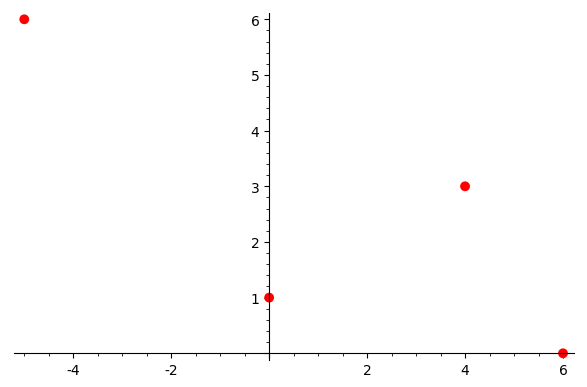

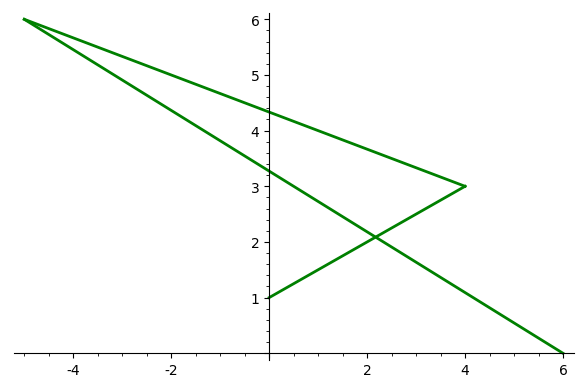

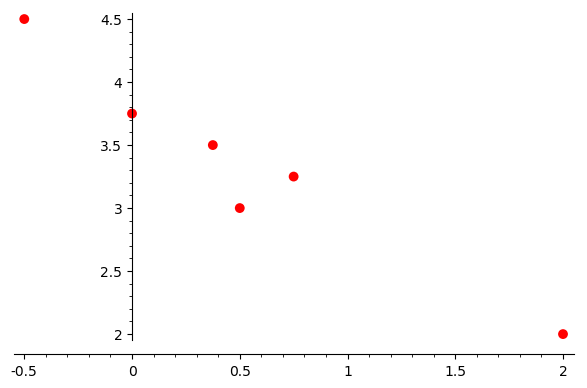

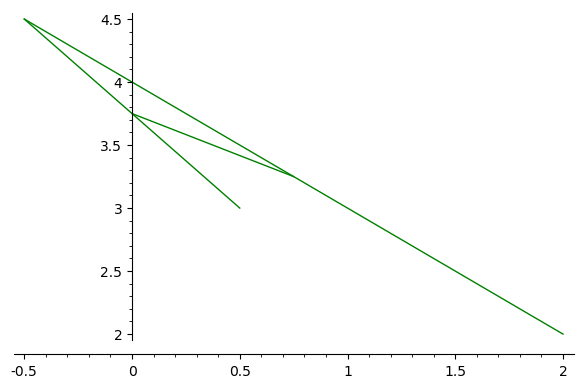

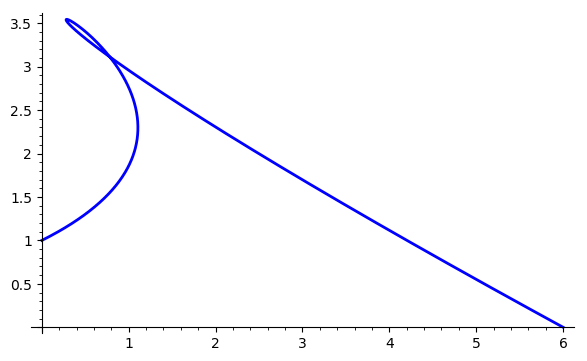

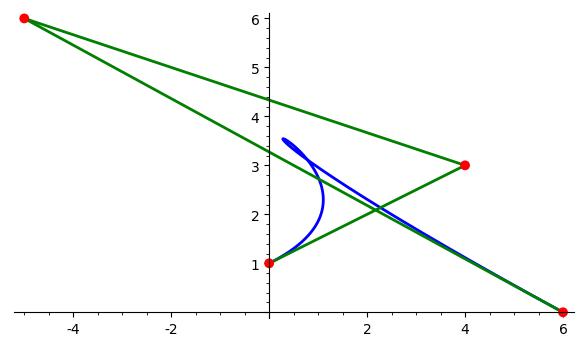

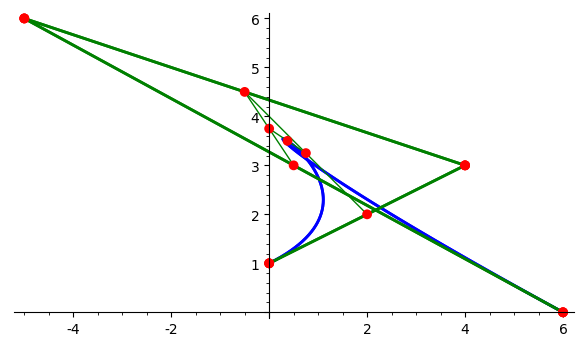

Animation with 20 frames
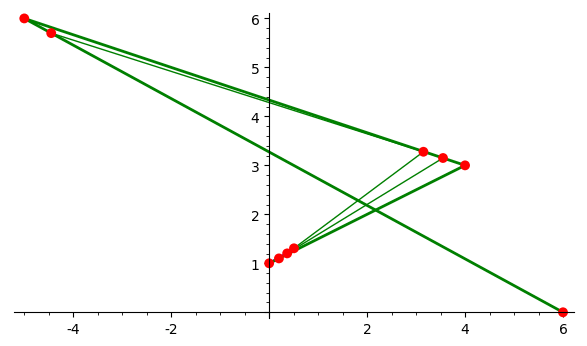

In [149]:
import random
a = vector([random.randrange(-10, 10), random.randrange(0, 10)])
b = vector([random.randrange(-10, 10), random.randrange(0, 10)])
c = vector([random.randrange(-10, 10), random.randrange(0, 10)])
d = vector([random.randrange(-10, 10), random.randrange(0, 10)])
# Erstellen eines neuen Objekts
sut = CubicBezier(a, b, c, d)

# Das Tatsächliche überprüfen erfolgt visuell.

pretty_print(sut.get_explicit_curve())

# Dies sind die erstellten Eckpnkte
print(sut.get_points())

# Die linien Ligen zwischen den Punkten
show(sut.plot_fix_points())
show(sut.plot_base_lines())

# Die linien Ligen zwischen den variablen Punkten
show(sut.plot_variable_points(value_of_t=0.5))
show(sut.plot_variable_lines(value_of_t=0.5))

# Die Punkte, Kurven und geraden stimmen überein
show(sut.plot_curve())
show(sut.get_full_plot())

# Zeigt alles in einem Plot
show(sut.plot_fix_points() + sut.plot_fix_points() +
     sut.plot_base_lines() + 
     sut.plot_variable_points(value_of_t=0.5) + 
     sut.plot_variable_lines(value_of_t=0.5) + 
     sut.plot_curve() + sut.get_full_plot())

# Zeigt das Ganze in einer Animation.
show(sut.get_animation(20))

## Aufgabe 3:
Andreas Hager

Bei dieser aufgabe ist eine Animation zu erstellen, welche ich an die Darstellung in dem obengenanten Wikipedia-Artikel angelehnt habe.

Animation with 50 frames
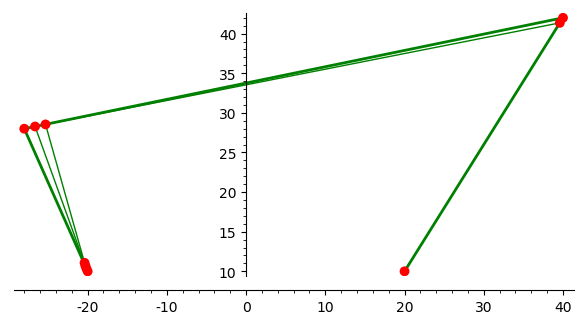

In [163]:
a = vector([-20, 10])
b = vector([-28, 28])
c = vector([40, 42])
d = vector([20, 10])

cubic = CubicBezier(a, b, c, d)

animation = cubic.get_animation(frames=50)
show(animation)
# animation.gif(savefile='bezier_animation.gif', delay=35, iterations=3)

## Aufgabe4:
Andreas Hager

Bei dieser Aufgabe ist eine spezielle Kurve und deren LIniensegmente zu Plotten.
Des weiteren soll anhand dieser die Beziehung von der Kurve zu den beiden Mittleren Punkten zu zeigen.

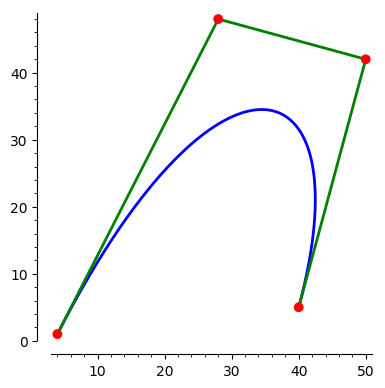

In [151]:
p1 = vector([4, 1])
p2 = vector([28, 48])
p3 = vector([50, 42])
p4 = vector([40, 5])

# Erstellen einer Kurve mit den Punkten P1, P2, P3 und P4
cubic = CubicBezier(p1, p2, p3, p4)

show(cubic.get_full_plot())

Die Punkte P2 und P3 krümmen die Kurve in ihre Richtung. Somit legt P2 fest mit welcher Steigung die Kurve von P1 in richtung P2 wandert. P3 legt fest mit welcher Steigung die Kurve in den Punkt P4 geht. (Siehe Beweis in aufgabe 5)

## Aufgabe 5:
Andreas Hager

In [152]:
# Aufstellen einer algemeinen kubischen Bezier-Kurve,
# mit den Punkten P1, P2, P3, P4, welche durch die Vektoren p1, p2, p3, p4
# dargestellt werden.
p1x, p2x, p3x, p4x = var('p1x, p2x, p3x, p4x')
p1y, p2y, p3y, p4y = var('p1y, p2y, p3y, p4y')
p1 = vector([p1x, p1y])
p2 = vector([p2x, p2y])
p3 = vector([p3x, p3y])
p4 = vector([p4x, p4y])
cubic = CubicBezier(p1, p2, p3, p4)

# Allgemeine algebraische darstellung der Kurve
curve = cubic.get_explicit_curve()

# Ableitund der Kurve
d_curve = diff(curve, t)

# Einsetzen des wertes 0 in die Ableitung 
# => wir haben den Steigungsvektor an dem Punkt P1
d_curve_at_t0 = d_curve.substitute(t=0)
# mit dieser Logischen gleichheit ist gezeigt, dass der Steigungsvector
# ein vielfaches der Strecke P1P2 = P2 - P1 ist.
print(d_curve_at_t0 == 3*(p2 - p1)) # 3* da dies der der Grad der Kurve ist.
# => Die Kurventangente in P1 geht durch P2

# Einsetzen des wertes 1 in die Ableitung 
# => wir haben den Steigungsvector an dem Punkt p4
d_curve_at_t1 = d_curve.substitute(t=1)
# mit dieser Logischen gleichheit ist gezeigt, dass der Steigungsvector
# ein vielfaches der Strecke P3P4 = P4 - P3 ist.
print(d_curve_at_t1 == 3*(p4 - p3))
# => Die Kurventangente in P4 geht durch P3

True
True


# Aufgabe 6:
Manuel Schmidbauer

Bei der Aufgabe 6 sollte ein C mit hilfe von einer Bezier Kurve erstellt werden.
Hierfür wurden die Punkte:
A = (3,-5)
B = (-3,-5)
C = (-3, 5)
D = (3, 5)
gewählt, um eine schönes C zu erschaffen, welches sich um den Koordiantenursprung bildet.

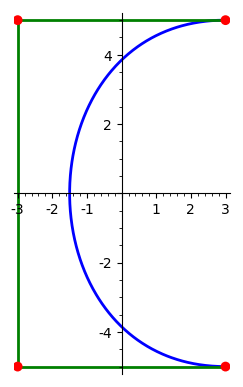

In [153]:
c = CubicBezier(vector([3, -5]), vector([-3, -5]), vector([-3, 5]), vector([3, 5]))
show(c.get_full_plot())

## Aufgabe 7:
Manuel Schmidbauer

Um einen glatten Übergang zwischen zwei Bezierkurven zu erschaffen muss die Steigung der beiden Funktionen am Übergangspunkt gleich sein.
Um dies sicherzustellen müssen spezielle Bedingungen für die Kontrollpunkte bestehen.
Man nehme an, die beiden Kurven bestehen aus den Kontrollpunkten A, B, C, D und E, F, G, wobei der Punkt D der Übergangspunkt ist und somit in beiden Kurven enthalten ist.  
Dann muss für die Punkte C, D, E gelten, dass jeweils die der Vektoren CD und DE die gleiche Steigung haben.

In [154]:
def get_gradient_at_t(cubic, current_t):
    """
    Calculates the gradient at the given point current_t using the limit function
    :param cubic: a CubicBezier object
    :param current_t: a value between 0 and 1 
    """
    function = cubic.get_explicit_curve()
    diff = function[1] / function[0]
    return limit(diff, t=current_t)

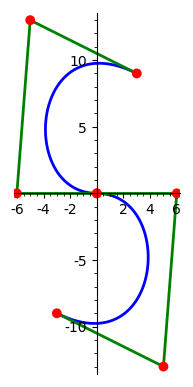

The gradient at the transition is THE SAME


In [155]:
A = vector([3, 9])
B = vector([-5, 13])
C = vector([-6, 0])
D = vector([0, 0])
E = vector([6, 0])
F = vector([5, -13])
G = vector([-3, -9])

# Creating two CubicBezier Curves with the shared point D
upper_curve = CubicBezier(A, B, C, D)
lower_curve = CubicBezier(D, E, F, G)

# Printing the curves
show(upper_curve.get_full_plot() + lower_curve.get_full_plot())

# Checking if the to have the same gradient at the transition
same_gradient = bool(get_gradient_at_t(upper_curve, 1) == get_gradient_at_t(lower_curve, 0))
same_statement = "THE SAME" if same_gradient else "NOT THE SAME"
print("The gradient at the transition is " + same_statement)

Hierbei ist es wichtig, das die Punkte A und G keinen Einfluss auf den Übergang haben!

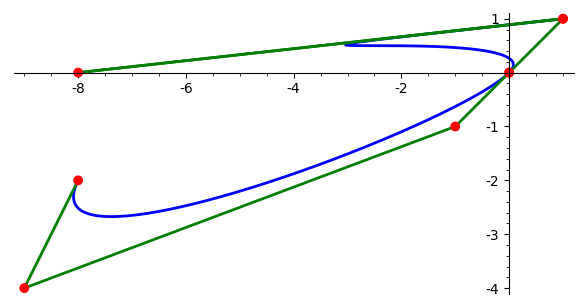

The gradient at the transition is THE SAME


In [156]:
import random

# The same example, but with random values for A, B, F and G
A = vector([random.randrange(-10, 10), random.randrange(0, 10)])
B = vector([random.randrange(-10, 10), random.randrange(0, 10)])

# Additionally the lenght of CD and DE is random
c_length = random.randrange(1, 5)
e_length = random.randrange(1, 5)

C = vector([c_length, c_length])
D = vector([0, 0])
E = vector([-e_length, -e_length])
F = vector([random.randrange(-10, 10), random.randrange(-10, 0)])
G = vector([random.randrange(-10, 10), random.randrange(-10, 0)])

# Creating two CubicBezier Curves with the shared point D
upper_curve = CubicBezier(A, B, C, D)
lower_curve = CubicBezier(D, E, F, G)

# Printing the curves
show(upper_curve.get_full_plot() + lower_curve.get_full_plot())

# Checking if the to have the same gradient at the transition
same_gradient = bool(get_gradient_at_t(upper_curve, 1) == get_gradient_at_t(lower_curve, 0))
same_statement = "THE SAME" if same_gradient else "NOT THE SAME"
print("The gradient at the transition is " + same_statement)

## Aufgabe 8 und 9:
Manuel Schmidbauer

Nun sollen mehrere Kurven aneinandere gefügt werden und somit ein schöner Weg aus Kurven entstehen. Hierzu wurde eine neue Klasse CubicBezierPath defeniert, welches solch einen Weg dastellt.  
Intern wird eine Liste aus CubicBezier Kurven gespeichert, welche jeweils gemeinsame Punkte haben und zusammen geplotted werden. Gemeinsam haben sie den Übergangspunkt D welcher durch einen neuen Punkt ergänzt wird. Dieser ist der negative Vektor DC addiert auf D, wodurch dieser Vektor um den Punkt D gespiegelt wird.

In [157]:
class CubicBezierPath:
    """
    A path of several cubic Bezier Curves with a smooth transition each
    """
    
    def __init__(self, base_curve):
        """
        Creates a new path from a base curve
        :param base_curve: the base cubicBezier curve
        """
        self.cubic_curves = [base_curve]
        
    def add_points(self, new_points):
        """
        Adds a array of new points to the curve
        :param new_points: [(A,B), (C,D), ...] a list of 2er tuples
        """
        for new_point in new_points:
            C, D = self.cubic_curves[-1].get_points()[-2:]
            new_curve = CubicBezier(D, D - (C-D), new_point[0], new_point[1])
            self.cubic_curves.append(new_curve)
        
    def get_full_plot(self):
        return_plot = self.cubic_curves[0].get_full_plot()
        if len(self.cubic_curves) > 1:
            for cubic_curve in self.cubic_curves[1:]:
                return_plot += cubic_curve.get_full_plot()
        return return_plot

Zudem wird eine Funktion defeniert welche aus sechs gegeben Punkten eben solch einen Weg generiert.

In [158]:
def generate_path_from_6_points(A, B, C, D, E, F):
    """
    Generates a new CubicBezierPath from 6 points
    """
    curve_path = CubicBezierPath(CubicBezier(A, B, C, D))
    curve_path.add_points([(E, F)])
    return curve_path

Im weiteren wird das oben bereits generierte S nun mit einem CubicBezierPath dargestellt.  
Zu diesem werden außerdem noch weiter Punkte addiert.

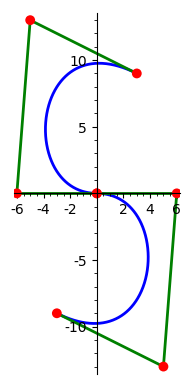

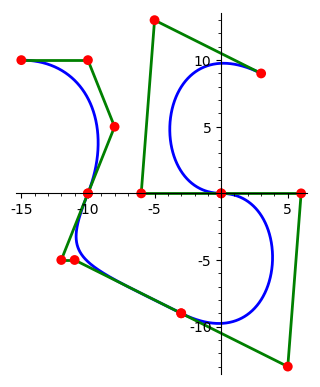

In [159]:
A = vector([3, 9])
B = vector([-5, 13])
C = vector([-6, 0])
D = vector([0, 0])

E = vector([5, -13])
F = vector([-3, -9])

# Creates the 'S' as a path of cubicBezierCurves
curve_path = generate_path_from_6_points(A, B, C, D, E, F)
show(curve_path.get_full_plot())

# Adds a additional test point
curve_path.add_points([(vector([-12, -5]), vector([-10, 0])), (vector([-10, 10]), vector([-15, 10]))])
show(curve_path.get_full_plot())